# _Black Friday Sale_

---------------------

### About Dataset

https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale

#### Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.  
Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

Tasks to perform  
The purchase col column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

#### DATA PREPROCESSING
Check basic statistics of the dataset  
Check for missing values in the data  
Check for unique values in data  

#### Perform EDA
Purchase Distribution  
Check for outliers  
Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc  
Drop unnecessary fields  
Convert categorical data into integer using map function (e.g 'Gender' column)  
Missing value treatment  
Rename columns  
Fill nan values  
Map range variables into integers (e.g 'Age' column)  

#### Data Visualisation

visualize an individual column  
Age vs Purchased  
Occupation vs Purchased  
Productcategory1 vs Purchased  
Productcategory2 vs Purchased  
Productcategory3 vs Purchased  
City category pie chart  
Check for more possible plots  

All the Best!!

#### Variable - Definition
User_ID - User ID  
Product_ID - Product ID  
Gender - Sex of User  
Age - Age in bins  
Occupation - Occupation (Masked)  
City_Category - Category of the City (A, B, C)  
Stay_In_Current_City_Years - Number of years stay in current city  
Marital_Status - Marital Status  
Product_Category_1 - Product Category (Masked)  
Product_Category_2 - Product may belong to other categories also (Masked)  
Product_Category_3 - Product may belong to other categories also (Masked)  
Purchase - Purchase Amount (Target Variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('black_friday_sale.csv')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
df.columns = [i.lower() for i in df.columns]

In [28]:
for feature in df.columns:
    if feature not in ('user_id', 'product_id', 'purchase'):
        df[feature] = df[feature].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  int64   
 1   product_id                  550068 non-null  object  
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_category               550068 non-null  category
 6   stay_in_current_city_years  550068 non-null  category
 7   marital_status              550068 non-null  category
 8   product_category_1          550068 non-null  category
 9   product_category_2          376430 non-null  category
 10  product_category_3          166821 non-null  category
 11  purchase                    550068 non-null  int64   
dtypes: category(9), int64(2), object(1)
memory usage: 17.3+ MB

In [30]:
df.describe()

,user_id,purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [31]:
df.describe(include='category')

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
count,550068,550068,550068,550068,550068,550068,550068,376430.0,166821.0
unique,2,7,21,3,5,2,20,17.0,15.0
top,M,26-35,4,B,1,0,5,8.0,16.0
freq,414259,219587,72308,231173,193821,324731,150933,64088.0,32636.0


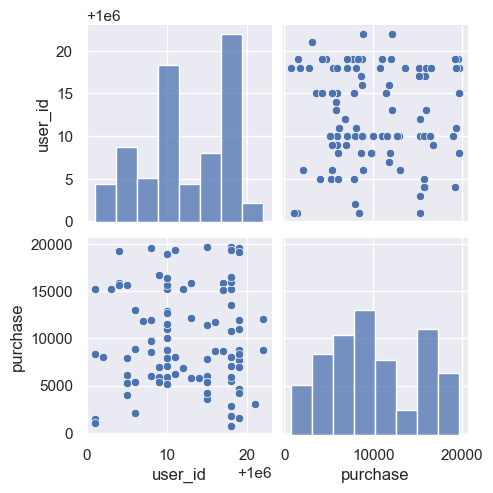

In [32]:
sns.pairplot(df.iloc[:100]);

In [15]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
